In [2]:
import sys 
sys.path.append('./../../src')

# python shit
from datetime import datetime

# my shit
from lib.stores.mysql import Mysql
from lib.oscillators import macd, stochastic_over_period, rsi
from lib.charts import chart

In [3]:
ticker = 'F'

mysql = Mysql()

In [4]:
mysql.update_candles(ticker, 60)

,t,o,c,h,l,r,v
0,2020-03-26 16:00:00,5.415,5.530,5.440,5.475,0.000000,12578875
1,2020-03-26 17:00:00,5.160,5.440,5.250,5.440,-0.016275,17379009
2,2020-03-26 18:00:00,5.185,5.310,5.255,5.250,-0.023897,14695092
3,2020-03-26 19:00:00,5.170,5.295,5.260,5.260,-0.002825,28033639
4,2020-03-26 20:00:00,5.200,5.280,5.260,5.230,-0.002833,6276787
...,...,...,...,...,...,...,...
2663,2021-03-31 22:00:00,12.270,12.310,12.290,12.290,32011.000000,0
2664,2021-03-31 23:00:00,12.250,12.300,12.290,12.270,33416.000000,0
2665,2021-04-01 11:00:00,12.280,12.340,12.340,12.300,44593.000000,0
2666,2021-04-01 12:00:00,12.280,12.340,12.300,12.340,208554.000000,0


In [ ]:
data = mysql.get_closes_by_symbol(ticker)

In [ ]:
days = 60

(macd_vals, sig_vals, histo_vals) = macd(data[['t','c']])
rsi_vals = rsi(data, 28)

price_line = data[['t','c']].tail(days)
macd_line = macd_vals.tail(days)
sig_line = sig_vals.tail(days)
histo = histo_vals.tail(days)
rsi_line = rsi_vals.tail(days)

oscillator_dicts = [
    { 'chart': 'line', 'data': macd_line, 'label': 'macd' },
    { 'chart': 'line', 'data': sig_line, 'label': 'signal' },
    { 'chart': 'bar', 'data': histo, 'label': '' },
    { 'chart': 'line', 'data': rsi_line, 'label': 'rsi', 'own_scale': True }
]

data_dicts = [
    { 'label': 'close', 'data': price_line }
]

# chart(ticker, data_dicts, oscillator_dicts)
import plotly.express as px
import plotly.graph_objs as go
import pandas

oscillators_df = pandas.DataFrame({
    'macd': macd_line,
    'signal': sig_line
})

chart_data = pandas.DataFrame({
    'price': price_line['c']
})


fig_price = px.line(
    chart_data, title='price',
    width=700, height=500
)

fig_macd = px.line(
    oscillators_df, title='macd',
    width=700, height=300
)
fig_macd.add_bar(y=histo, name='')

fig_rsi = px.line(
    rsi_line, title='rsi',
    width=700, height=250
)
fig_rsi.update_layout(yaxis_range=[0,100])

fig_price.show()
fig_macd.show()
fig_rsi.show()

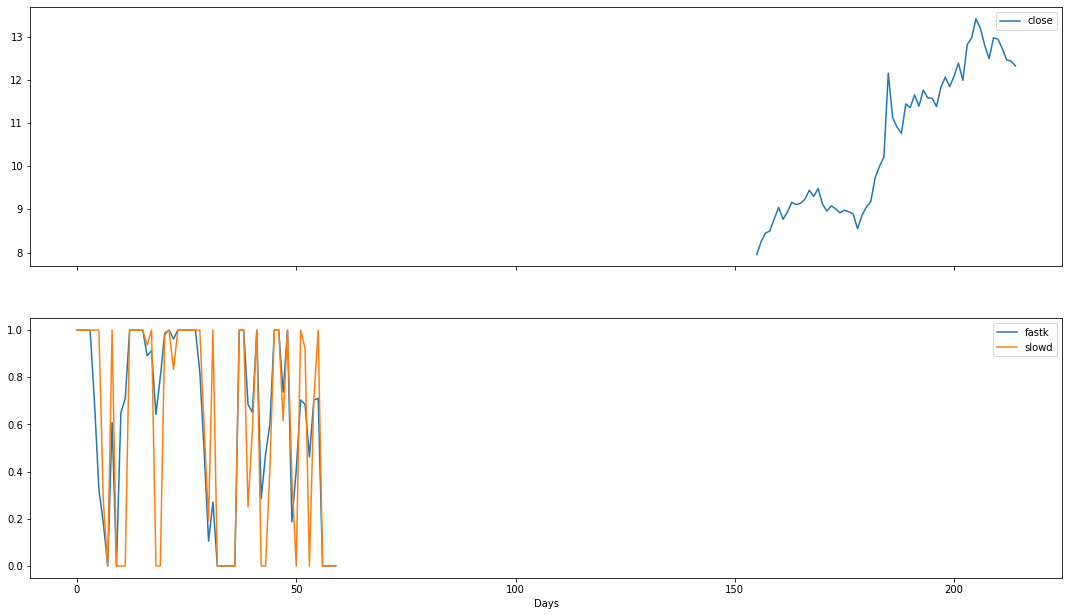

In [8]:
stochastic_vals = stochastic_over_period(list(data['c']), days)

fastk_data = list([i[0] for i in stochastic_vals])
slowd_data = list([i[2] for i in stochastic_vals])

oscillator_dicts = [
    { 'chart': 'line', 'data': fastk_data, 'label': 'fastk'},
    { 'chart': 'line', 'data': slowd_data, 'label': 'slowd'}
]

data_dicts = [
    { 'label': 'close', 'data': chart_data }
]

chart(ticker, data_dicts, oscillator_dicts)